In [0]:
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, plot_roc_curve,confusion_matrix
from sklearn.model_selection import KFold

In [0]:
data_path = "/dbfs/FileStore/tables/creditcard.csv"
df = pd.read_csv(data_path)

In [0]:
df.head()

Out[3]:

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [0]:
genuine = df[df.Class == 0].sample(frac=0.5,random_state=2000).reset_index(drop=True)
fradulent = df[df.Class == 1]

In [0]:
print(f"Genuine: {genuine.shape}")
print(f"Fradulent: {fradulent.shape}")

Genuine: (142158, 31)
Fradulent: (492, 31)

In [0]:
fradulent.Amount.describe()

Out[6]: count 492.000000
mean 122.211321
std 256.683288
min 0.000000
25% 1.000000
50% 9.250000
75% 105.890000
max 2125.870000
Name: Amount, dtype: float64

In [0]:
genuine.Amount.describe()

Out[7]: count 142158.000000
mean 88.798711
std 258.353939
min 0.000000
25% 5.780000
50% 22.060000
75% 77.730000
max 25691.160000
Name: Amount, dtype: float64

In [0]:
def plot_histogram(df, bins, column, log_scale=False):
    
    bins = 100

    fradulent = df[df.Class == 1]
    genuine = df[df.Class == 0]

    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
    fig.suptitle(f'Counts of {column} by Class')

    ax1.hist(fradulent[column], bins = bins, color="red")
    ax1.set_title('Fradulent')

    ax2.hist(genuine[column], bins = bins, color="orange")
    ax2.set_title('Genuine')

    plt.xlabel(f'{column}')
    plt.ylabel('Count')
    if log_scale:
       plt.yscale('log')
    plt.xlim((np.min(df[column]), np.max(df[column])))
    plt.show()

In [0]:
def plot_scatter(df, x_col, y_col, sharey = False):
    fradulent = df[df.Class == 1]
    genuine = df[df.Class == 0]
    
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=sharey)
    fig.suptitle(f'{y_col} over {x_col} by Class')
    
    ax1.scatter(fradulent[x_col], fradulent[y_col], color='red')
    ax1.set_title('Fradulent')
    
    ax2.scatter(genuine[x_col], genuine[y_col], color='orange')
    ax2.set_title('Genuine')
    
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.show()

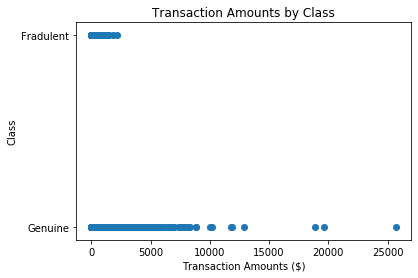

In [0]:
plt.scatter(df.Amount, df.Class)
plt.title("Transaction Amounts by Class")
plt.ylabel("Class")
plt.yticks(range(2), ["Genuine", "Fradulent"])
plt.xlabel("Transaction Amounts ($)")
plt.show()

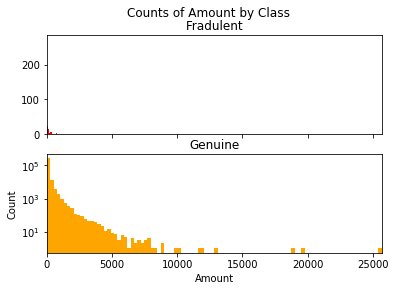

In [0]:
bins = 100
plot_histogram(df, bins, "Amount", log_scale=True)

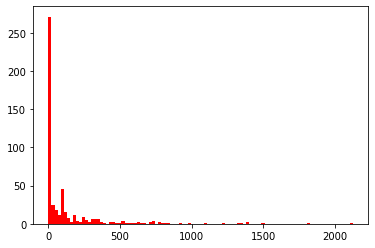

In [0]:
plt.hist(fradulent.Amount, bins = bins, color="red")
plt.show()

V1 vs Counts

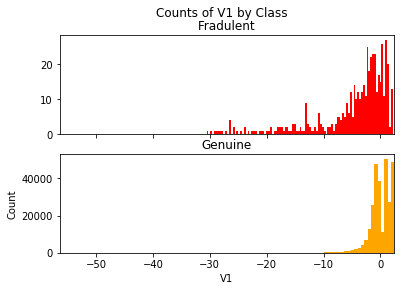

V2 vs Counts

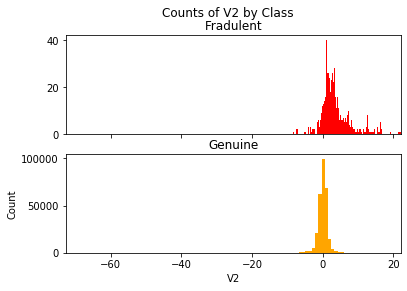

V3 vs Counts

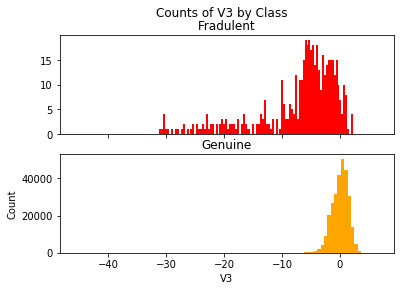

V4 vs Counts

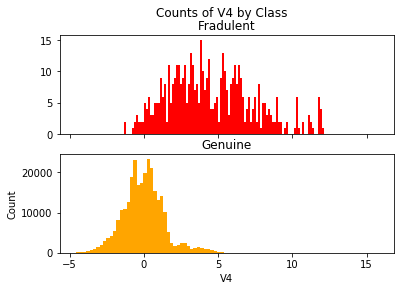

V5 vs Counts

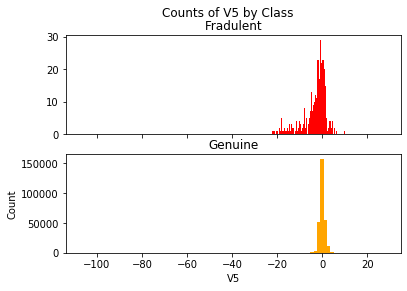

V6 vs Counts

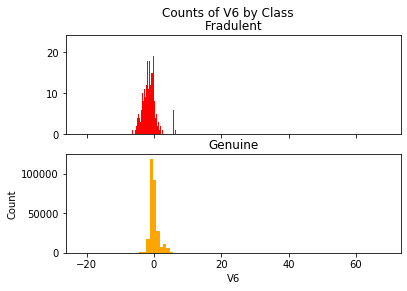

V7 vs Counts

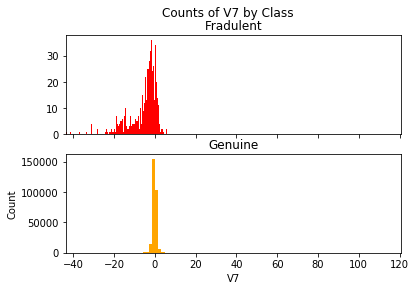

V8 vs Counts

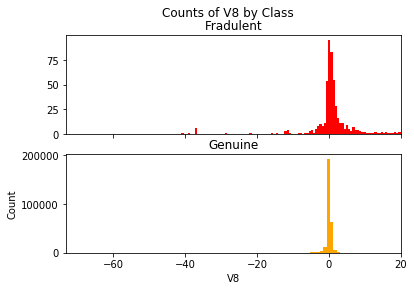

V9 vs Counts

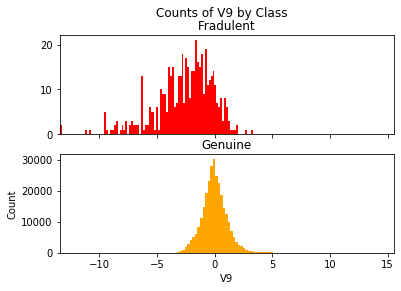

V10 vs Counts

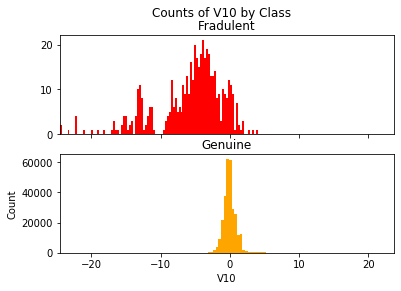

V11 vs Counts

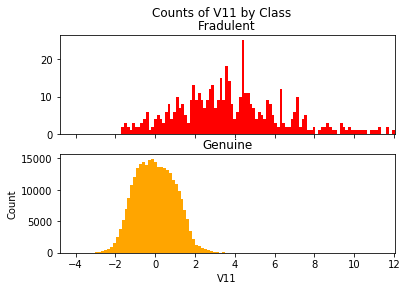

V12 vs Counts

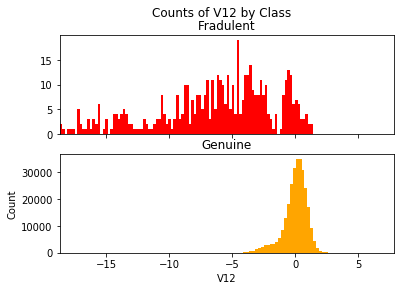

V13 vs Counts

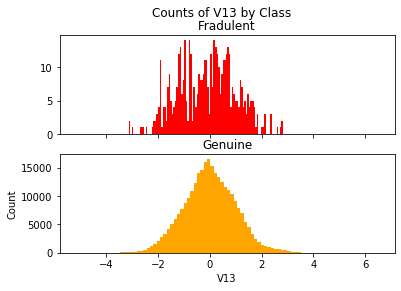

V14 vs Counts

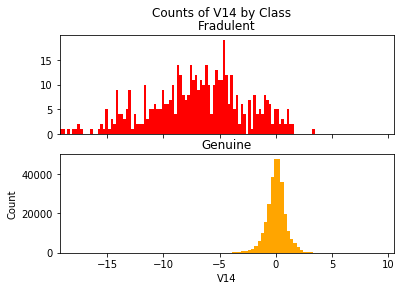

V15 vs Counts

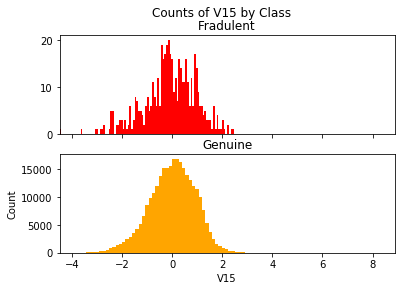

V16 vs Counts

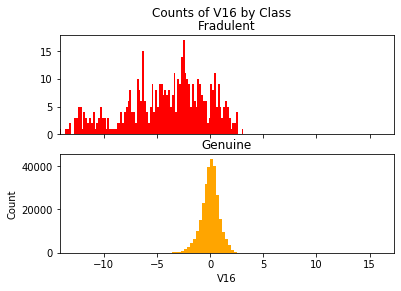

V17 vs Counts

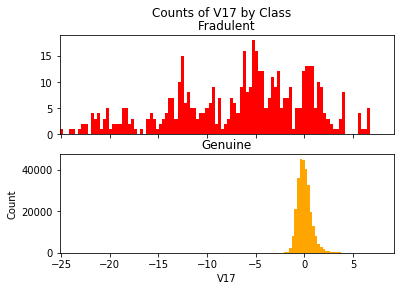

V18 vs Counts

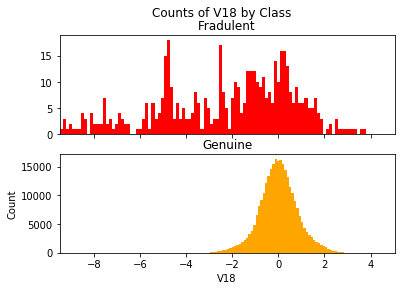

V19 vs Counts

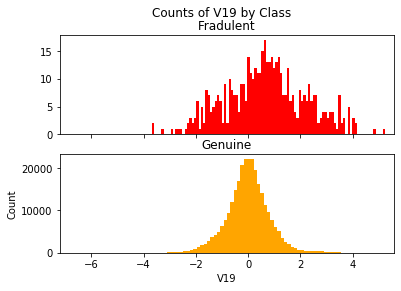

V20 vs Counts

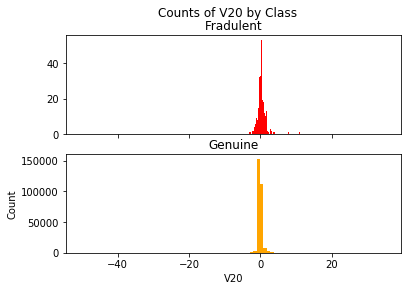

V21 vs Counts

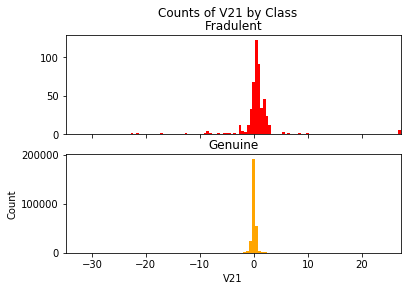

V22 vs Counts

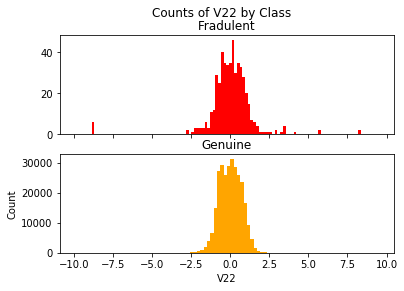

V23 vs Counts

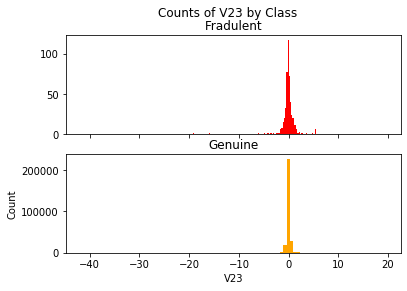

V24 vs Counts

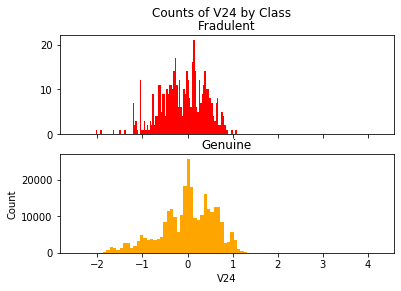

V25 vs Counts

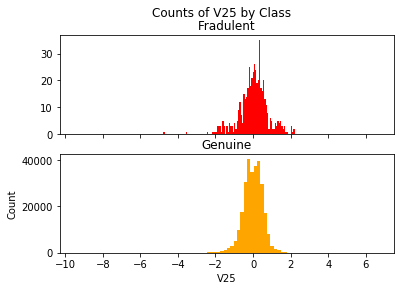

V26 vs Counts

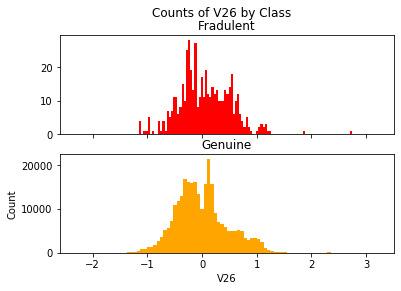

V27 vs Counts

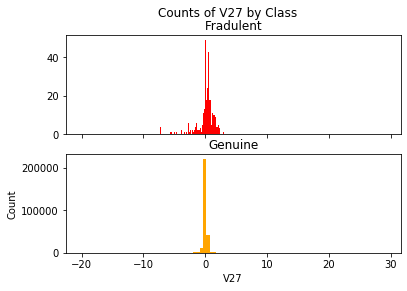

V28 vs Counts

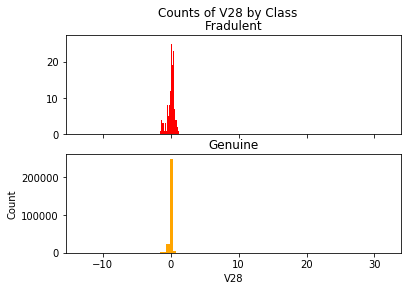

In [0]:
# Columns VS Counts
for f in range(1, 29):
    print(f'V{f} vs Counts')
    plot_histogram(df, bins, f'V{f}')

V1 vs Time

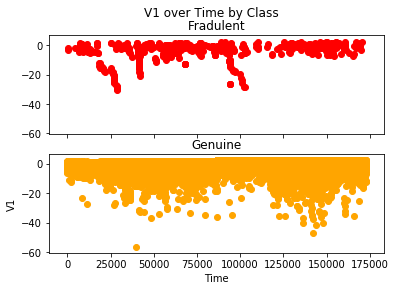

V2 vs Time

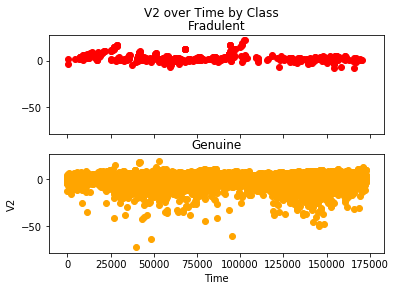

V3 vs Time

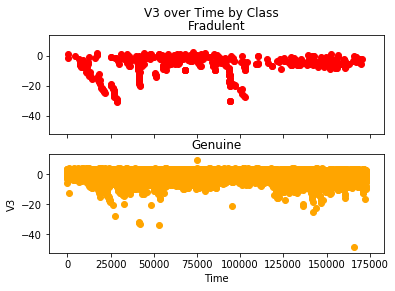

V4 vs Time

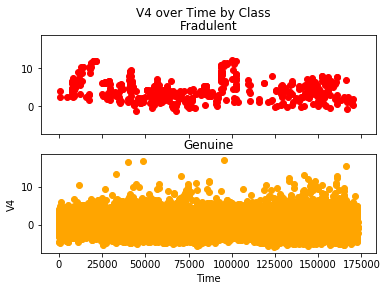

V5 vs Time

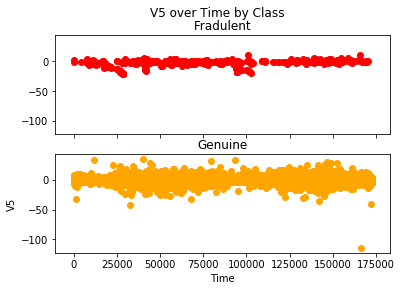

V6 vs Time

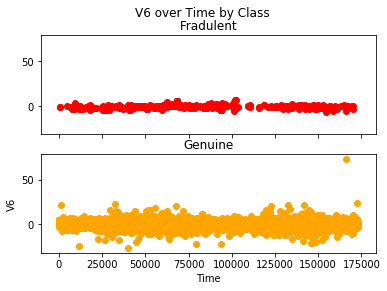

V7 vs Time

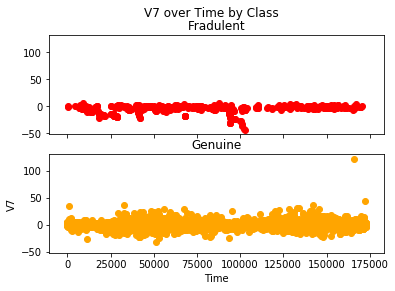

V8 vs Time

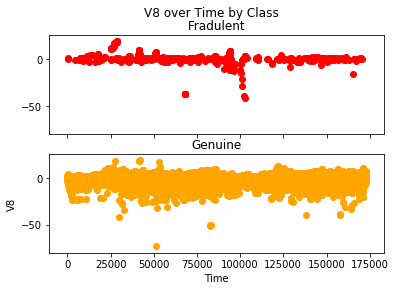

V9 vs Time

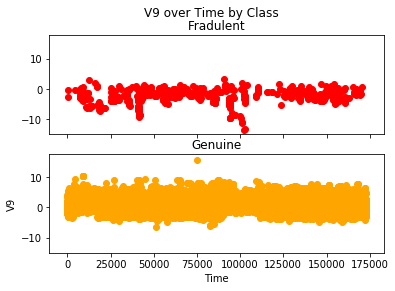

V10 vs Time

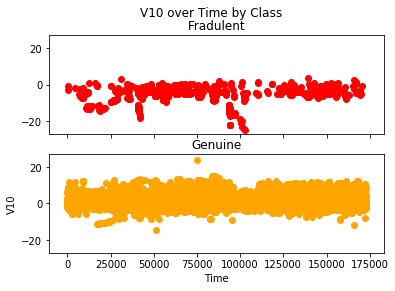

V11 vs Time

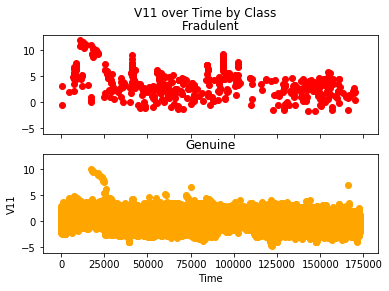

V12 vs Time

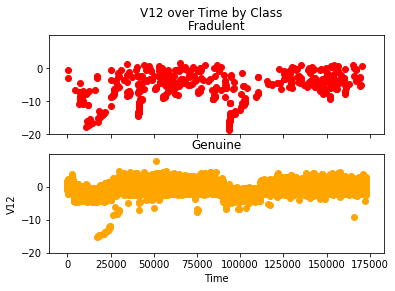

V13 vs Time

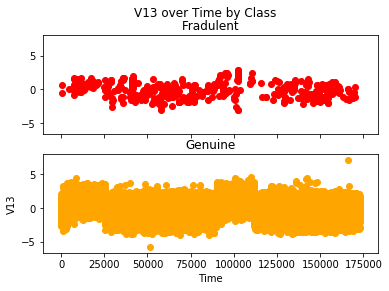

V14 vs Time

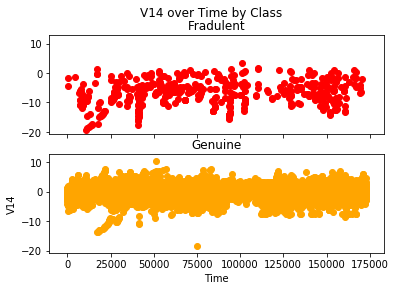

V15 vs Time

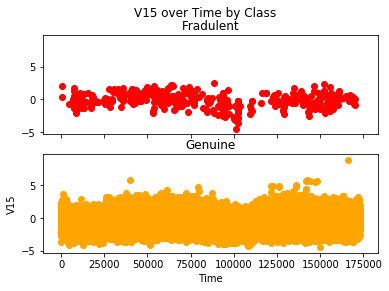

V16 vs Time

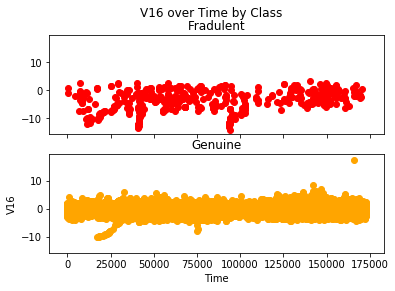

V17 vs Time

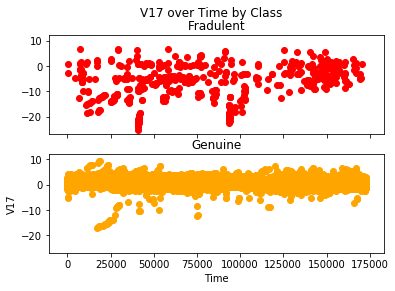

V18 vs Time

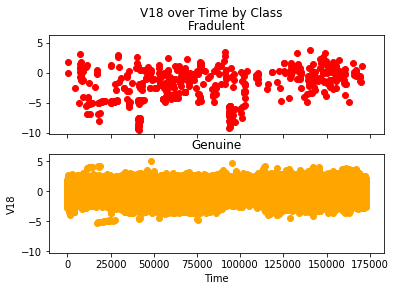

V19 vs Time

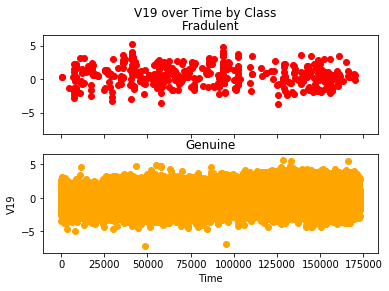

V20 vs Time

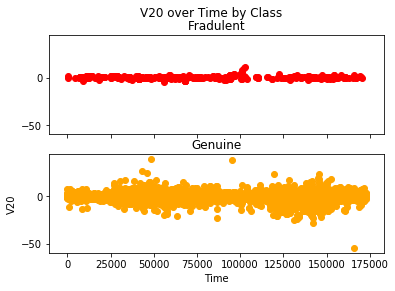

V21 vs Time

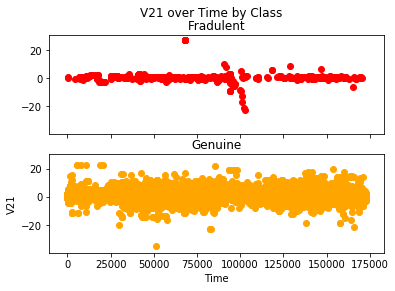

V22 vs Time

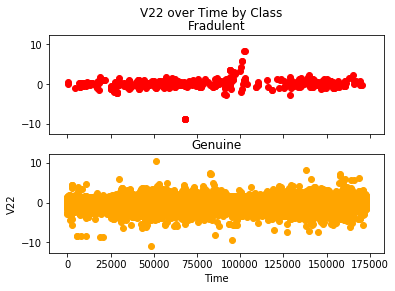

V23 vs Time

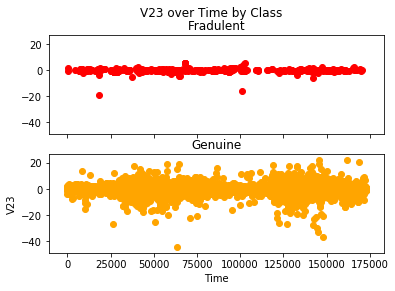

V24 vs Time

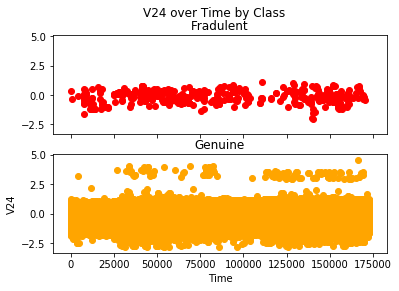

V25 vs Time

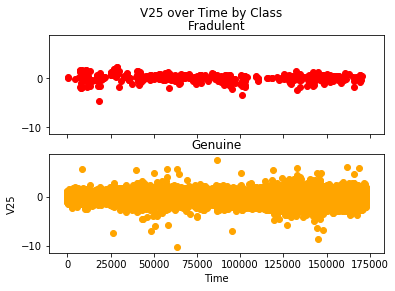

V26 vs Time

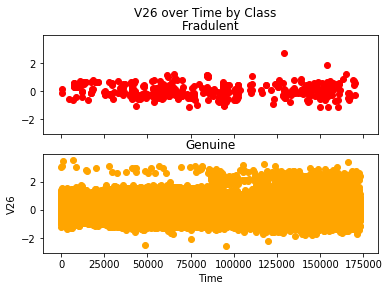

V27 vs Time

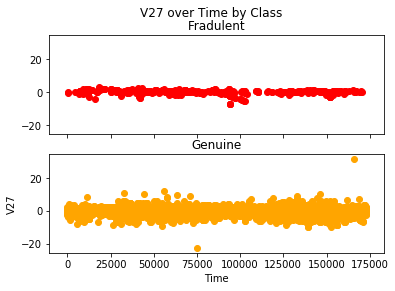

V28 vs Time

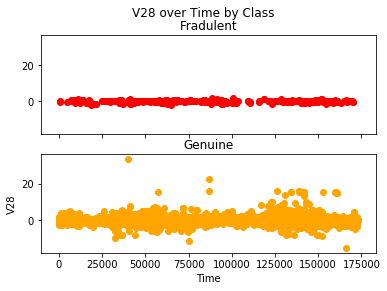

In [0]:
# Plot according to time and cloumn
for f in range(1, 29):
    print(f'V{f} vs Time')
    plot_scatter(df, "Time", f'V{f}', sharey=True)

In [0]:
# Column vs Amount
for f in range(1, 29):
    print(f'Amount vs V{f}')
    plot_scatter(df, f'V{f}', "Amount", sharey=True)

Amount vs V1

Amount vs V2

Amount vs V3

Amount vs V4

Amount vs V5

Amount vs V6

Amount vs V7

Amount vs V8

Amount vs V9

Amount vs V10

Amount vs V11

Amount vs V12

Amount vs V13

Amount vs V14

Amount vs V15

Amount vs V16

Amount vs V17

Amount vs V18

Amount vs V19

Amount vs V20

Amount vs V21

Amount vs V22

Amount vs V23

Amount vs V24

Amount vs V25

Amount vs V26

Amount vs V27

Amount vs V28

In [0]:
#split  normal points and anomalies into training and testing sets
genuine_train, genuine_test = train_test_split(genuine, test_size= 0.2, random_state = 2020)
fradulent_train, fradulent_test = train_test_split(fradulent,test_size = 0.2, random_state = 2020)

In [0]:
# creating training and validation splits
genuine_train, genuine_validate = train_test_split(genuine_train,test_size = 0.25, random_state = 2020)
fradulent_train, fradulent_validate = train_test_split(fradulent_train, test_size = 0.25, random_state = 2020)

In [0]:
#define x_train, x_test, and x_validate

x_train = pd.concat((genuine_train, fradulent_train))
x_test = pd.concat((genuine_test, fradulent_test))
x_validate = pd.concat((genuine_validate, fradulent_validate))

#define y_train, y_test, and y_validate
y_train = np.array(x_train["Class"])
y_test = np.array(x_test["Class"])
y_validate = np.array(x_validate["Class"])

# drop the column Class in the x sets
x_train = x_train.drop("Class", axis=1)
x_test = x_test.drop("Class", axis=1)
x_validate = x_validate.drop("Class", axis=1)

In [0]:
print("Training sets:\nx_train: {} y_train: {}".format(x_train.shape, y_train.shape))
print("\nTesting sets:\nx_test: {} y_test: {}".format(x_test.shape, y_test.shape))
print("\nValidation sets:\nx_validate: {} y_validate:{}".format(x_validate.shape, y_validate.shape))

Training sets:
x_train: (85588, 30) y_train: (85588,)

Testing sets:
x_test: (28531, 30) y_test: (28531,)

Validation sets:
x_validate: (28531, 30) y_validate:(28531,)

In [0]:
#code to standardize data:
scaler = StandardScaler()
scaler.fit(pd.concat((genuine, fradulent)).drop("Class", axis=1))

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
x_validate = scaler.transform(x_validate)

In [0]:
#logistic regression model:
sk_model = LogisticRegression(random_state=None, max_iter=400,solver='newton-cg').fit(x_train, y_train)

In [0]:
# Model Evaluation
eval_acc = sk_model.score(x_test, y_test)

In [0]:
# Prediction and calculation of AUR score
preds = sk_model.predict(x_test)
auc_score = roc_auc_score(y_test, preds)

# print out the scores
print(f"Auc Score: {auc_score:.3%}")
print(f"Eval Accuracy: {eval_acc:.3%}")

Auc Score: 83.826%
Eval Accuracy: 99.863%

In [0]:
#Plot ROC
roc_plot = plot_roc_curve(sk_model, x_test, y_test,name='Scikit-learn ROC Curve')

In [0]:
#Confusion Matrix
conf_matrix = confusion_matrix(y_test, preds)
ax = sns.heatmap(conf_matrix, annot=True,fmt='g')
ax.invert_xaxis()
ax.invert_yaxis()
plt.ylabel('Actual')
plt.xlabel('Predicted')

Out[44]:

Text(0.5, 15.0, 'Predicted')

In [0]:
# Model Validation
fradulent_weights = [1, 5, 10, 15]
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True,random_state=2020)

In [0]:
logs = []
for f in range(len(fradulent_weights)):
    fold = 1
    accuracies = []
    auc_scores= []
    for train, test in kfold.split(x_validate, y_validate):
        weight = fradulent_weights[f]
        class_weights= {
            0:1,
            1: weight
        }
        sk_model = LogisticRegression(random_state=None,
                                      max_iter=400,
                                      solver='newton-cg',
                                      class_weight=class_weights).fit(x_validate[train],y_validate[train])
        for h in range(40): print('-', end="")
        print(f"\nfold {fold}\nFradulent Weight: {weight}")

        eval_acc = sk_model.score(x_validate[test],y_validate[test])
        preds = sk_model.predict(x_validate[test])
        try:
            auc_score = roc_auc_score(y_validate[test], preds)
        except:
            auc_score = -1
            
        print("AUC: {}\neval_acc: {}".format(auc_score, eval_acc))
        
        accuracies.append(eval_acc)
        auc_scores.append(auc_score)
        
        log = [sk_model, x_validate[test], y_validate[test], preds]
        logs.append(log)
        
        fold = fold + 1
        
    print("\nAverages: ")
    print("Accuracy: ", np.mean(accuracies))
    print("AUC: ", np.mean(auc_scores))
    print("Best: ")
    print("Accuracy: ", np.max(accuracies))
    print("AUC: ", np.max(auc_scores))

----------------------------------------
fold 1
Fradulent Weight: 1
AUC: 0.8748241603657465
eval_acc: 0.9987734361310671
----------------------------------------
fold 2
Fradulent Weight: 1
AUC: 0.8807764794572183
eval_acc: 0.9987732211706976
----------------------------------------
fold 3
Fradulent Weight: 1
AUC: 0.8181818181818181
eval_acc: 0.9985979670522257
----------------------------------------
fold 4
Fradulent Weight: 1
AUC: 0.8416656640722607
eval_acc: 0.9980722046968104
----------------------------------------
fold 5
Fradulent Weight: 1
AUC: 0.8820892744512112
eval_acc: 0.9987732211706976

Averages: 
Accuracy: 0.9985980100442996
AUC: 0.859507479305651
Best: 
Accuracy: 0.9987734361310671
AUC: 0.8820892744512112
----------------------------------------
fold 1
Fradulent Weight: 5
AUC: 0.9247362405486197
eval_acc: 0.9989486595409147
----------------------------------------
fold 2
Fradulent Weight: 5
AUC: 0.9521171001382083
eval_acc: 0.999123729407641
----------------------------------------
fold 3
Fradulent Weight: 5
AUC: 0.9316422493762395
eval_acc: 0.999123729407641
----------------------------------------
fold 4
Fradulent Weight: 5
AUC: 0.8944730826538828
eval_acc: 0.9987732211706976
----------------------------------------
fold 5
Fradulent Weight: 5
AUC: 0.8819134966343718
eval_acc: 0.998422712933754

Averages: 
Accuracy: 0.9988784104921298
AUC: 0.9169764338702645
Best: 
Accuracy: 0.999123729407641
AUC: 0.9521171001382083
----------------------------------------
fold 1
Fradulent Weight: 10
AUC: 0.9242966414629858
eval_acc: 0.9980725424916769
----------------------------------------
fold 2
Fradulent Weight: 10
AUC: 0.9758386732001507
eval_acc: 0.999123729407641
----------------------------------------
fold 3
Fradulent Weight: 10
AUC: 0.9316422493762395
eval_acc: 0.999123729407641
----------------------------------------
fold 4
Fradulent Weight: 10
AUC: 0.8941214033853757
eval_acc: 0.9980722046968104
----------------------------------------
fold 5
Fradulent Weight: 10
AUC: 0.8816498299091124
eval_acc: 0.9978969505783386

Averages: 
Accuracy: 0.9984578313164215
AUC: 0.9215097594667728
Best: 
Accuracy: 0.999123729407641
AUC: 0.9758386732001507
----------------------------------------
fold 1
Fradulent Weight: 15
AUC: 0.9239449621944786
eval_acc: 0.9973716488522867
----------------------------------------
fold 2
Fradulent Weight: 15
AUC: 0.9755748209574067
eval_acc: 0.9985979670522257
----------------------------------------
fold 3
Fradulent Weight: 15
AUC: 0.9312903844923551
eval_acc: 0.998422712933754
----------------------------------------
fold 4
Fradulent Weight: 15
AUC: 0.8940334835682489
eval_acc: 0.9978969505783386
----------------------------------------
fold 5
Fradulent Weight: 15
AUC: 0.8812982742754334
eval_acc: 0.9971959341044515

Averages: 
Accuracy: 0.9978970427042112
AUC: 0.9212283850975845
Best: 
Accuracy: 0.9985979670522257
AUC: 0.9755748209574067

In [0]:
sk_model, x_val, y_val, preds = logs[11]

In [0]:
roc_plot = plot_roc_curve(sk_model, x_val, y_val, name='Scikit-learnROC Curve')

In [0]:
# Confusion matrix of validation result
conf_matrix = confusion_matrix(y_val, preds)
ax = sns.heatmap(conf_matrix, annot=True,fmt='g')
ax.invert_xaxis()
ax.invert_yaxis()
plt.ylabel('Actual')
plt.xlabel('Predicted')

Out[51]:

Text(0.5, 15.0, 'Predicted')